# Linear Discriminant Analysis
La **Linear Discriminant Analysis (LDA)** è una tecnica di riduzione della dimensionalità che funziona in maniera molto simile alla Principal Component Analysis (PCA), la differenza principale é che la PCA è una tecnica non supervisionata (opera ignorando i label dei dati), mentre la LDA è una tecnica supervisionata che allo stesso tempo cerca di:
 * Massimizzare la distanza tra le classi nei dati.
 * Minimizzare la varianza degli esempi appartenenti a una singola classe.
 
 <img src="lda.png" width="500px" />
 
 Nei problemi di classificazione, in cui il numero di esempi appartenenti a ogni classe è bilanciato, la LDA performa meglio della PCA.<br><br>
Osserviamo questo fatto sull'Iris Dataset. Cominciamo importando le librerie necessarie.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

Carichiamo l'Iris Dataset all'interno di un DataFrame.

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','target'])

iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Creiamo gli array numpy di addestramento e predizione.

In [3]:
X = iris.drop("target", axis=1).values
y = iris["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

Le classi sono stringhe che rappresentano il nome del fiore, codifichiamole in numeri.

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Prima di eseguire la LDA o la PCA dobbiamo essere **SICURISSIMI** che i dati siano su di una scala comune, quindi eseguiamo la standardizzazione del dataset.

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()  
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

## Classificazione dopo la PCA

Cominciamo con l'eseguire la Principal Component Analysis per ridurre lo spazio dimensionale da 4 a 2.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_train = pca.fit_transform(X_train)
pc_test = pca.transform(X_test)

Visualizziamo le due componenti principali su di un piano tramite uno scatter plot.

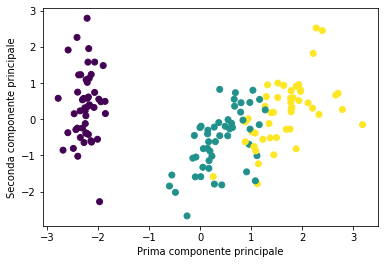

In [7]:
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")
plt.scatter(pc_train[:,0], pc_train[:,1], c=y_train)
plt.scatter(pc_test[:,0], pc_test[:,1], c=y_test)
plt.show()

Una classe è nettamente definita mentre due si sovrappongono lievemente, eseguiamo una regressione logistica e osserviamone accuracy e log loss.

In [8]:
lr = LogisticRegression()
lr.fit(pc_train, y_train)

y_pred_train = lr.predict(pc_train)
y_prob_train = lr.predict_proba(pc_train)

y_pred = lr.predict(pc_test)
y_prob = lr.predict_proba(pc_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

loss_train = log_loss(y_train, y_prob_train)
loss_test = log_loss(y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

ACCURACY: TRAIN=0.9167 TEST=0.8667
LOG LOSS: TRAIN=0.2067 TEST=0.2446


## Classificazione dopo la LDA
Adesso proviamo con la Linear Discriminant Analysis, prima di proseguire dobbiamo assicurarci che le classi all'interno del dataset siano bilanicate, possiamo farlo utilizzando la funzione <span style="font-family: Monaco">unique</span> di Numpy e imstando il parametro <span style="font-family: Monaco">return_counts</span> a True.


In [9]:
np.unique(y, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

Le classi sono perfettamente bilanciate, possiamo eseguire la Linear Discriminant Analysis utilizzando la classe LDA di sklearn, specifichiamo il numero di discriminatori a 2 all'interno del parametro n_components del costruttore.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
ld_train = lda.fit_transform(X_train, y_train)
ld_test = lda.transform(X_test)

Visualizziamo i due discriminatori su di un piano tramite uno scatter plot.

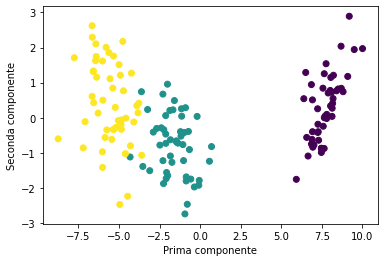

In [11]:
plt.xlabel("Prima componente")
plt.ylabel("Seconda componente")
plt.scatter(ld_train[:,0], ld_train[:,1], c=y_train)
plt.scatter(ld_test[:,0], ld_test[:,1], c=y_test)
plt.show()

La classe che dopo la PCA era ben definita continua a esserlo, ma ora è anche molto più densa, cioè i suoi esempi sono più vicini tra loro, merito del fatto che la LDA tende a ridurre la variabilità all'interno delle classi.<br>
Le classi che dopo la PCA erano lievemente sovrapposte adesso lo sono molto meno.
<br><br>
Eseguiamo una regressione logistica e osserviamone accuracy e log loss.

In [12]:
lr = LogisticRegression()
lr.fit(ld_train, y_train)

y_pred_train = lr.predict(ld_train)
y_prob_train = lr.predict_proba(ld_train)

y_pred = lr.predict(ld_test)
y_prob = lr.predict_proba(ld_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

loss_train = log_loss(y_train, y_prob_train)
loss_test = log_loss(y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

ACCURACY: TRAIN=0.9750 TEST=1.0000
LOG LOSS: TRAIN=0.0638 TEST=0.0349


I risultati sono nettamente migliori !<br>Abbiamo dimostrato il nostro assunto iniziale, che per problemi di classificazione con classi bilanciate la LDA performa meglio della PCA.

## Quando usare la PCA, quando la LDA

### PCA
* Problemi di **apprendimento non supervisionato**
* Probelmi di apprendimento supervisionato dove le classi all'interno del dataset sono sbilanciate, ovvero il numero di esempi di una classe è molto maggiore rispetto a quelli delle altre classi
<br>

### LDA
* Tutti gli altri casi